In [1]:
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None
# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

# Code for section 3.2

In [2]:
df = pd.read_excel("dataset.xlsx", sheet_name=None, header=0)

In [3]:
all_df = {}
for i, d in enumerate(df.items()):
    name, data = d
    all_df[name] = data
# all_data = pd.concat(df.values())
all_data = all_df['1K-01']

In [4]:
all_data = all_data[[ "DEPTH", "DT", "GR", "LLD", "NPHI", "RHOB", "Log_Facies", "Fluid"]]
all_data = all_data.dropna(axis=0, how='any')
data = all_data

In [5]:
data = data[data['DEPTH'] == data["DEPTH"]]   # drop NaN value row

In [6]:
data['Log_Facies'] = data['Log_Facies'].apply(lambda x: int(x))

In [7]:
comb = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
def label_facies(row):
    f = row['Fluid']
    lf = row['Log_Facies']
    return comb.index((f, lf)) + 1
data['MixLabel'] = data.apply(label_facies, axis=1)


In [8]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

In [9]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    
    facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
    
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    facies_colors = facies_colors[4:] + facies_colors[:4]
    cmap_facies1 = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    cluster=np.repeat(np.expand_dims(logs['Log_Facies'].values,1), 100, 1)
    cluster2=np.repeat(np.expand_dims(logs['Fluid'].values,1), 100, 1)
#     cluster3 = np.repeat(np.expand_dims(Y_pred_2, 1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs['MixLabel'].values, 1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(9, 12))
    ax[0].plot(logs.DT, logs.DEPTH, '-g')
    ax[1].plot(logs.GR, logs.DEPTH, '-')
    ax[2].plot(logs.LLD, logs.DEPTH, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.DEPTH, '-', color='r')
    ax[4].plot(logs.RHOB, logs.DEPTH, '-', color='black')
    im=ax[6].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2=ax[5].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies1,vmin=1,vmax=9)
#     im3=ax[6].imshow(cluster3, interpolation='none', aspect='auto',
#                     cmap=cmap_facies, vmin=1,vmax=9)
    im4=ax[7].imshow(cluster4, interpolation='none', aspect='auto',
                    cmap=cmap_facies, vmin=1,vmax=9)
 
    
#     divider = make_axes_locatable(ax[5])
#     cax = divider.append_axes("right", size="20%", pad=0.05)
#     cbar=plt.colorbar(im, cax=cax)
#     cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
#                                 'SiSh', ' MS ', ' WS ', ' D  ', 
#                                 ' PS ', ' BS ']))
#     cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-3):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("DT")
    ax[0].set_xlim(logs.DT.min(),logs.DT.max())
    ax[1].set_xlabel("GR")
    ax[1].set_xlim(logs.GR.min(),logs.GR.max())
    ax[2].set_xlabel("LLD")
    ax[2].set_xlim(logs.LLD.min(),logs.LLD.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RHOB")
    ax[4].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    
    
    ax[6].set_xlabel('Facies')
    
    ax[5].set_xlabel('Fluid')
#     ax[6].set_xlabel('KMeans')
    ax[7].set_xlabel('MixLabel')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])
    
#     ax[5].set_yticklabels([])
#     ax[5].set_xticklabels([])
    
#     ax[7].set_yticklabels([])
#     ax[7].set_xticklabels([])
#     f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

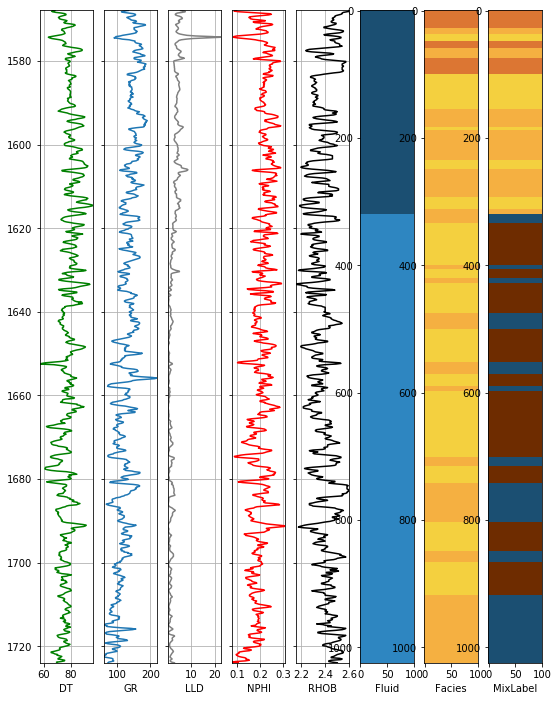

In [10]:
make_facies_log_plot(
    data,
    facies_colors)

In [11]:
data

,DEPTH,DT,GR,LLD,NPHI,RHOB,Log_Facies,Fluid,MixLabel
0,1567.8912,68.31,134.2510,5.6598,0.0948,2.60,3,1,3
1,1568.0436,65.88,121.1500,7.4373,0.0855,2.60,3,1,3
2,1568.1960,66.50,113.6260,7.7061,0.1066,2.58,3,1,3
3,1568.3484,69.00,120.0850,6.3580,0.1494,2.55,3,1,3
4,1568.5008,73.00,133.9920,4.3997,0.1973,2.54,3,1,3
...,...,...,...,...,...,...,...,...,...
1020,1723.3392,75.50,88.0509,1.4149,0.1521,2.45,2,2,5
1021,1723.4916,75.31,90.7924,1.3479,0.1342,2.43,2,2,5
1022,1723.6440,73.00,84.2197,1.5385,0.0917,2.43,2,2,5
1023,1723.7964,69.44,75.5446,2.0338,0.0761,2.46,2,2,5
